# Titanic - Machine Learning from Disaster

## Kaggle Competition
## Author: Rafael Pereira da Silva
## Kaggle Score for this solution: 0.78

## Importing Data


# 1 - Problem understanding

The "Titanic - Machine Learning from Disaster" competition consists in understanding and predicting if the passager survived the disaster or not.

Two data sets are given:

* train.csv - which contains passagers information and if they survived or not.
* test.csv - which is used to test how good our prediction model is.


# 2 - Data understanding

## Data dictionary

Table below presents the available datas and their type, options and descriptions.


| Data | Type  | Options | Description |
| :-- | :-- | :-- | :-- |
|Passager Id | int | - | Passager identification |
|  Survived  | bool | {0, 1} | 0 = No, 1 = Yes |
|  Pclass  | int | {1, 2, 3} | Ticket class --> 1 = 1st, 2 = 2nd, 3 = 3rd |
|  Name  | str | - | Passager name |
|  Sex  | str | {male, female} | Passager sex |
|  Age  | float |  | Age in years |
|  SibSp  | int | - | # of siblings / spouses aboard the Titanic |
|  Parch  | int | - | # of parents / children aboard the Titanic |
|  Ticket  | str | - | Ticket number |
|  Fare  | float | - | Passenger fare |
|  Cabin  | str | - | Cabin number |
|  Embarked  | str | {C, Q, S} | Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton |


## Available data

In [71]:
import pandas as pd
import numpy as np

In [105]:
# Classification functions (based in insights and to organize data)

def classify_class(Pclass):
    '''Convert Pclass into a str'''
    class_info = {
        1: "1st_class",
        2: "2nd_class",
        3: "3rd_class"
    }
    return class_info[Pclass]


def classify_relatives(n_of_relatives):
    '''Classify Parch and SibSp'''
    if n_of_relatives == 0:
        return 0
    else:
        return 1

    
def classify_age_bin(age):
    if age <= 10:
        return "0-10"
    elif age <= 20:
        return "11-20"
    elif age <= 30:
        return "21-30"
    elif age <= 40:
        return "31-40"
    elif age <= 50:
        return "41-50"
    elif age<= 60:
        return "51-60"
    else:
        return ">50"


def classify_child(age): # Based in insights
    if age <= 10:
        return 1
    else:
        return 0

In [106]:
# importing dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [107]:
# Enriching train_df data (some of them are used to data training)
train_df['count'] = 1

class_info = [classify_class(c) for c in train_df['Pclass']]
SibSp_info = [classify_relatives(r) for r in train_df['SibSp']]
Parch_info = [classify_relatives(r) for r in train_df['Parch']]
age_bins = [classify_age_bin(a) for a in train_df['Age']]
is_child = [classify_child(a) for a in train_df['Age']]

train_df['class_info'] = class_info
train_df['SibSp_info'] = SibSp_info
train_df['Parch_info'] = Parch_info
train_df['age_bins'] = age_bins
train_df['is_child'] = is_child


class_info_t = [classify_class(c) for c in test_df['Pclass']]
SibSp_info_t = [classify_relatives(r) for r in test_df['SibSp']]
Parch_info_t = [classify_relatives(r) for r in test_df['Parch']]
age_bins_t = [classify_age_bin(a) for a in test_df['Age']]
is_child_t = [classify_child(a) for a in test_df['Age']]

test_df['class_info'] = class_info_t
test_df['SibSp_info'] = SibSp_info_t
test_df['Parch_info'] = Parch_info_t
test_df['age_bins'] = age_bins_t
test_df['is_child'] = is_child_t

In [108]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count,class_info,SibSp_info,Parch_info,age_bins,is_child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3rd_class,1,0,21-30,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1st_class,1,0,31-40,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3rd_class,0,0,21-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1st_class,1,0,31-40,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3rd_class,0,0,31-40,0


In [109]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class_info,SibSp_info,Parch_info,age_bins,is_child
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3rd_class,0,0,31-40,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3rd_class,1,0,41-50,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2nd_class,0,0,>50,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,3rd_class,0,0,21-30,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3rd_class,1,1,21-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,3rd_class,0,0,>50,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1st_class,0,0,31-40,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,3rd_class,0,0,31-40,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,3rd_class,0,0,>50,0


## Data visualization

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns



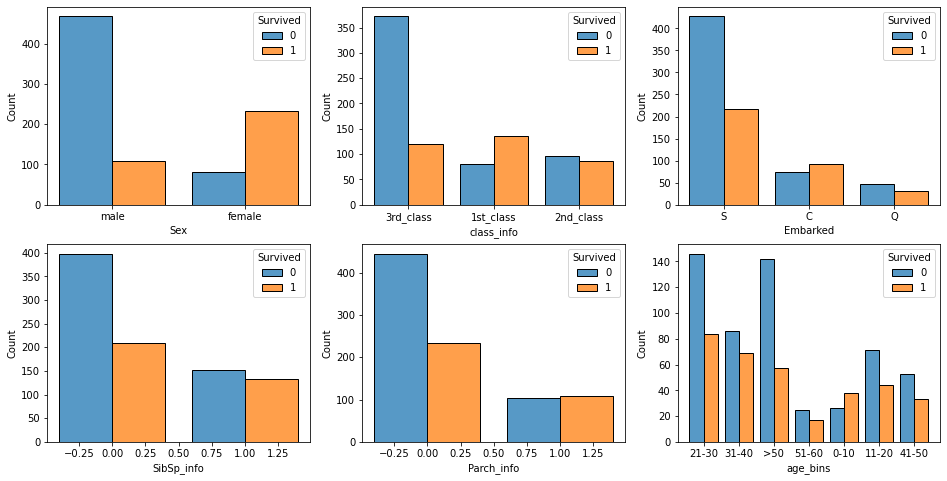

In [9]:
plt.figure(figsize=(16, 8))

plt.subplot(231)
sns.histplot(data=train_df, x="Sex", hue="Survived", multiple="dodge", shrink=.8)

plt.subplot(232)
sns.histplot(data=train_df, x="class_info", hue="Survived", multiple="dodge", shrink=.8)

plt.subplot(233)
sns.histplot(data=train_df, x="Embarked", hue="Survived", multiple="dodge", shrink=.8)

plt.subplot(234)
sns.histplot(data=train_df, x="SibSp_info", hue="Survived", multiple="dodge", shrink=.8,  bins=2, discrete=True)

plt.subplot(235)
sns.histplot(data=train_df, x="Parch_info", hue="Survived", multiple="dodge", shrink=.8,  bins=2, discrete=True)

plt.subplot(236)
sns.histplot(data=train_df, x="age_bins", hue="Survived", multiple="dodge", shrink=.8,  bins=2, discrete=True)

plt.show()

0.0
512.3292
32.2042079685746
49.693428597180905


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

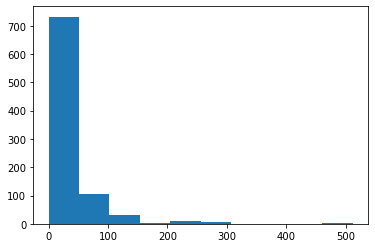

In [10]:
# Checking fare
print(train_df['Fare'].min())
print(train_df['Fare'].max())
print(train_df['Fare'].mean())
print(train_df['Fare'].std())
plt.hist(train_df['Fare'])

In [11]:
# Checking correlation between fare and Pclass
pd.pivot_table(train_df, index='class_info', values=['Fare'], aggfunc='sum')

,Fare
class_info,
1st_class,18177.4125
2nd_class,3801.8417
3rd_class,6714.6951


In [12]:
# Checking correlation between Embarked and Pclass
pd.pivot_table(train_df, index='Embarked' , columns='class_info', values='count', aggfunc='count')


class_info,1st_class,2nd_class,3rd_class
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


0
8
0.5230078563411896
1.1027434322934275


(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

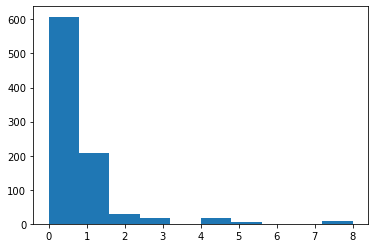

In [13]:
print(train_df['SibSp'].min())
print(train_df['SibSp'].max())
print(train_df['SibSp'].mean())
print(train_df['SibSp'].std())
plt.hist(train_df['SibSp'])

0
6
0.38159371492704824
0.8060572211299559


(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

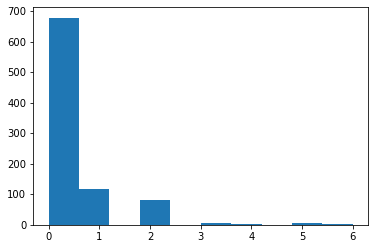

In [14]:
print(train_df['Parch'].min())
print(train_df['Parch'].max())
print(train_df['Parch'].mean())
print(train_df['Parch'].std())
plt.hist(train_df['Parch'])

#  3 - Data Preparation

## Insights

1. Female sex has to be correlation with chances of surviving.
2. Richier classes has to be correlation with chances of surviving.
3. Pclass, Fare and Embarked seems to be proportional, so only Pclass will be used.
4. Passenger that has relatives seems to be more chances of surviving.
5. Relatives (SibSp and Parch) are classified as boolean.
6. Child under 10 years old seems to be more chances of surviving.
7. Name, ticket and Cabin will be ignored.

## Selecting and cleaning data

Feature selection are listed based in insights.

In [111]:
features = ['Pclass', 'Sex', 'is_child', 'SibSp_info', 'Parch_info']

In [112]:
selected_data = train_df[features + ['Survived']].dropna(axis=0, how='any')
selected_data

,Pclass,Sex,is_child,SibSp_info,Parch_info,Survived
0,3,male,0,1,0,0
1,1,female,0,1,0,1
2,3,female,0,0,0,1
3,1,female,0,1,0,1
4,3,male,0,0,0,0
...,...,...,...,...,...,...
886,2,male,0,0,0,0
887,1,female,0,0,0,1
888,3,female,0,1,1,0
889,1,male,0,0,0,1


In [118]:
selected_test_df = test_df[features].fillna(0) # if there is no age, we consider as not child

#  4 - Modeling

This is a classification problem, so Random Forest Model is used.

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
y = selected_data['Survived']
x = pd.get_dummies(selected_data[features])
x_test = pd.get_dummies(selected_test_df)

In [120]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x, y)
predictions = model.predict(x_test)
predictions

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [124]:
result = pd.DataFrame({'PassengerId': test_df['PassengerId'],
                       'Survived': predictions})
result.to_csv('submission.csv', index=False)

Kaggle score for these predictions is 0.78